# Lead Scoring Case Study

In [1]:
# Importing needed libraries for EDA and further analysis
import warnings
warnings.filterwarnings('ignore')
import os
import csv
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
%matplotlib inline 
import seaborn as sns
sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
from seaborn import countplot, axes_style
from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

## 1. Exploratory Data Analysis

#### Data Loading

In [2]:
#Load the given csv file as dataframe and check the number of columns and rows in the dataframe obtained
Lead_Score_init_df = pd.read_csv('Leads.csv')
Lead_Score_init_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead_Score_init_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
##Understanding the dataframe 'Lead_Score_init_df'
Lead_Score_init_df.shape

(9240, 37)

In [5]:
#Further insights on the dataframe 'Lead_Score_init_df' to understand how the data is spread 
Lead_Score_init_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#To check further info about the columns in dataframe Lead_Score_init_df
Lead_Score_init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
Lead_Score_init_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking the column-wise null values in the dataframe 'Lead_Score_init_df'

Lead_Score_init_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [9]:
# Checking the percentage of null values in the dataframe 'Lead_Score_init_df' column-wise
round(100*(Lead_Score_init_df.isnull().sum()/len(Lead_Score_init_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Dropping the columns that are not required for the intended study/analysis and also the columns which are having high % of missing values(> 40%)

Lead_Score_init_df = Lead_Score_init_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                                              'Asymmetrique Profile Index','Asymmetrique Profile Score',
                                              'Get updates on DM Content', 'I agree to pay the amount through cheque', 
                                              'X Education Forums', 'Receive More Updates About Our Courses', 
                                              'Do Not Call','Search','Newspaper Article',
                                              'Newspaper', 'Magazine','Digital Advertisement',
                                              'Through Recommendations', 'Lead Number', 
                                               'A free copy of Mastering The Interview',
                                             'Update me on Supply Chain Content', 'Do Not Email','Prospect ID', 'Lead Quality'],1)


In [11]:
#Checking the % of missing values for existing columns
round(100*(Lead_Score_init_df.isnull().sum()/len(Lead_Score_init_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
Last Notable Activity                             0.00
dtype: float64

In [12]:
# Checking the values for the column 'Tags'
print(Lead_Score_init_df['Tags'].value_counts()) 

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [13]:
# Checking the values for the column 'What is your current occupation'
print(Lead_Score_init_df['What is your current occupation'].value_counts()) 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [14]:
# Checking the values for the column 'Specialization'
print(Lead_Score_init_df['Specialization'].value_counts()) 

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [15]:
# Checking the values for the column 'Last Activity'
print(Lead_Score_init_df['Last Activity'].value_counts()) 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


In [16]:
# Checking the values for the column 'Last Notable Activity'
print(Lead_Score_init_df['Last Notable Activity'].value_counts())

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64


In [17]:
# Checking the values for the column 'Country'
print(Lead_Score_init_df['Country'].value_counts())

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Italy                      2
Uganda                     2
Netherlands                2
Belgium                    2
Ghana                      2
Philippines                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Indonesia                  1
Kenya                      1
Denmark                    1
Switzerland                1
Russia                     1
Liberia                    1
Malaysia      

##### As observed above, most of the leads are from Country 'India'.
This column doesnt have much of variance , so this wouldn't have much impact, would go ahead and drop this column.

In [18]:
# Dropping the column 'Country'
Lead_Score_init_df = Lead_Score_init_df.drop(['Country'],1)

In [19]:
print(Lead_Score_init_df['City'].value_counts())

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


##### As observed above, most of the leads are from City 'Mumbai' and didn't prefer to give the city.
This column doesnt have much of variance and most of the values are also related to  "Select" (default option), would go ahead and drop this column.

In [20]:
# Dropping the column 'City'
Lead_Score_init_df = Lead_Score_init_df.drop(['City'],1)

In [21]:
print(Lead_Score_init_df['What matters most to you in choosing a course'].value_counts()) 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


##### As observed above, most of the leads prefer 'Better Career Prospects'
As this wouldn't have much impact on Analysis(no varaince), would go ahead and drop this column.


In [22]:
# Dropping the column 'What matters most to you in choosing a course'
Lead_Score_init_df = Lead_Score_init_df.drop(['What matters most to you in choosing a course'],1)

In [23]:
# Imputing the data for the baove columns accordingly considering 'mode' for the data in each column
Lead_Score_init_df['How did you hear about X Education'] = Lead_Score_init_df['How did you hear about X Education'].replace(np.nan, 'Other')
Lead_Score_init_df['Lead Profile'] = Lead_Score_init_df['Lead Profile'].replace(np.nan, 'Select')
Lead_Score_init_df['Last Notable Activity'] = Lead_Score_init_df['Last Notable Activity'].replace(np.nan, 'Modified')
Lead_Score_init_df['Tags'] = Lead_Score_init_df['Tags'].replace(np.nan, 'Will revert after reading the email')
Lead_Score_init_df['What is your current occupation'] = Lead_Score_init_df['What is your current occupation'].replace(np.nan, 'Unemployed')
Lead_Score_init_df['Last Activity'] = Lead_Score_init_df['Last Activity'].replace(np.nan, 'Email Opened')


In [24]:
(round(Lead_Score_init_df.isnull().sum()/len(Lead_Score_init_df.index), 2)*100).sort_values(ascending=False)

Specialization                        16.0
Page Views Per Visit                   1.0
TotalVisits                            1.0
Last Notable Activity                  0.0
Lead Profile                           0.0
Tags                                   0.0
What is your current occupation        0.0
How did you hear about X Education     0.0
Last Activity                          0.0
Total Time Spent on Website            0.0
Converted                              0.0
Lead Source                            0.0
Lead Origin                            0.0
dtype: float64

In [25]:
Lead_Score_init_df.dropna(inplace = True)

In [26]:
print((round(Lead_Score_init_df.isnull().sum()/len(Lead_Score_init_df.index), 2)*100).sort_values(ascending=False))

Last Notable Activity                 0.0
Lead Profile                          0.0
Tags                                  0.0
What is your current occupation       0.0
How did you hear about X Education    0.0
Specialization                        0.0
Last Activity                         0.0
Page Views Per Visit                  0.0
Total Time Spent on Website           0.0
TotalVisits                           0.0
Converted                             0.0
Lead Source                           0.0
Lead Origin                           0.0
dtype: float64


In [27]:
# Checking the values for the column 'Lead Source'
print(Lead_Score_init_df['Lead Source'].value_counts())

Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64


In [28]:
# To find the unique values in the column 'Lead Source'
Lead_Score_init_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [29]:
# Replacing the words 'google' with 'Google' as they are identical
Lead_Score_init_df['Lead Source'] = Lead_Score_init_df['Lead Source'].replace(['google'], 'Google')

In [30]:
Lead_Score_init_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                           7643 non-null object
Lead Source                           7643 non-null object
Converted                             7643 non-null int64
TotalVisits                           7643 non-null float64
Total Time Spent on Website           7643 non-null int64
Page Views Per Visit                  7643 non-null float64
Last Activity                         7643 non-null object
Specialization                        7643 non-null object
How did you hear about X Education    7643 non-null object
What is your current occupation       7643 non-null object
Tags                                  7643 non-null object
Lead Profile                          7643 non-null object
Last Notable Activity                 7643 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 836.0+ KB


In [31]:
Lead_Score_init_df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

In [32]:
# Remnaming the column names of the dataframe for easy handling of the column names
Lead_Score_init_df.rename(columns = {"Lead Source": "Lead_Source"}, inplace =True)
Lead_Score_init_df.rename(columns = {"A free copy of Mastering The Interview": "A_free_copy_of_Mastering_The_Interview"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Lead Number": "Lead_Number"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Lead Origin": "Lead_Origin"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Do Not Email": "Do_Not_Email"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Do Not Call": "Do_Not_Call"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Total Time Spent on Website": "Total_Time_Spent_on_Website"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Page Views Per Visit": "Page_Views_Per_Visit"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Last Activity": "Last_Activity"}, inplace =True)
Lead_Score_init_df.rename(columns = {"How did you hear about X Education": "How_did_you_hear_about_X_Education"}, inplace =True)
Lead_Score_init_df.rename(columns = {"What is your current occupation": "What_is_your_current_occupation"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Receive More Updates About Our Courses": "Receive_More_Updates_About_Our_Courses"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Newspaper Article": "Newspaper_Article"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Digital Advertisement": "Digital_Advertisement"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Through Recommendations": "Through_Recommendations"}, inplace =True)
#Lead_Score_init_df.rename(columns = {"Lead Quality": "Lead_Quality"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Update me on Supply Chain Content": "Update_me_on_Supply_Chain_Content"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Get updates on DM Content ": "Get_updates_on_DM_Content "}, inplace =True)
Lead_Score_init_df.rename(columns = {"Lead Profile": "Lead_Profile"}, inplace =True)
Lead_Score_init_df.rename(columns = {"Last Notable Activity": "Last_Notable_Activity"}, inplace =True)

In [33]:
Lead_Score_init_df.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation', 'Tags', 'Lead_Profile',
       'Last_Notable_Activity'],
      dtype='object')

In [34]:
Lead_Score_init_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 13 columns):
Lead_Origin                           7643 non-null object
Lead_Source                           7643 non-null object
Converted                             7643 non-null int64
TotalVisits                           7643 non-null float64
Total_Time_Spent_on_Website           7643 non-null int64
Page_Views_Per_Visit                  7643 non-null float64
Last_Activity                         7643 non-null object
Specialization                        7643 non-null object
How_did_you_hear_about_X_Education    7643 non-null object
What_is_your_current_occupation       7643 non-null object
Tags                                  7643 non-null object
Lead_Profile                          7643 non-null object
Last_Notable_Activity                 7643 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 836.0+ KB


### Univariate Analysis

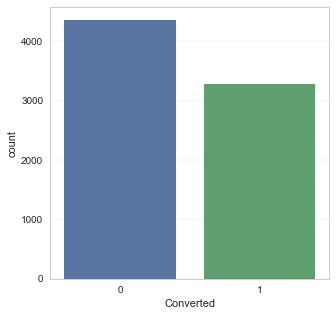

In [35]:
#Plot a count plot based on the target variable 'converted'
plt.figure(figsize=(5,5))
sns.countplot(x = "Converted", palette='deep', data = Lead_Score_init_df)
plt.xticks(rotation = 0)
plt.show()

### The target variable thus indicates that '0' represents Non-converted and '1' represents Converted

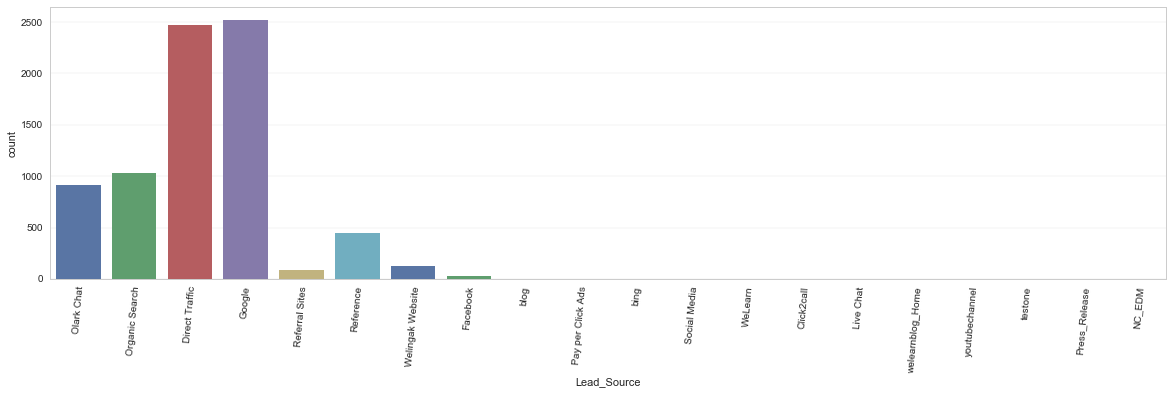

In [36]:
#Plotting a count plot on 'Lead_Source'
plt.figure(figsize=(20,5))
sns.countplot(x = "Lead_Source", palette='deep', data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

#### As we observe there are almost very minimal categorical values or zero values in the column 'Lead_Source'
#### Lets merge those into 'Misc'

In [37]:
#Merging the elements with least frequency elements in 'Lead_Source' into a group 'Misc'
Lead_Score_init_df['Lead_Source'] = Lead_Score_init_df['Lead_Source'].replace(['Press_Release', 'Social Media', 'WeLearn', 'NC_EDM','bing', 'Pay per Click Ads', 'testone', 'welearnblog_Home', 'Click2call', 'youtubechannel', 'blog', 'Live Chat'],'Misc')

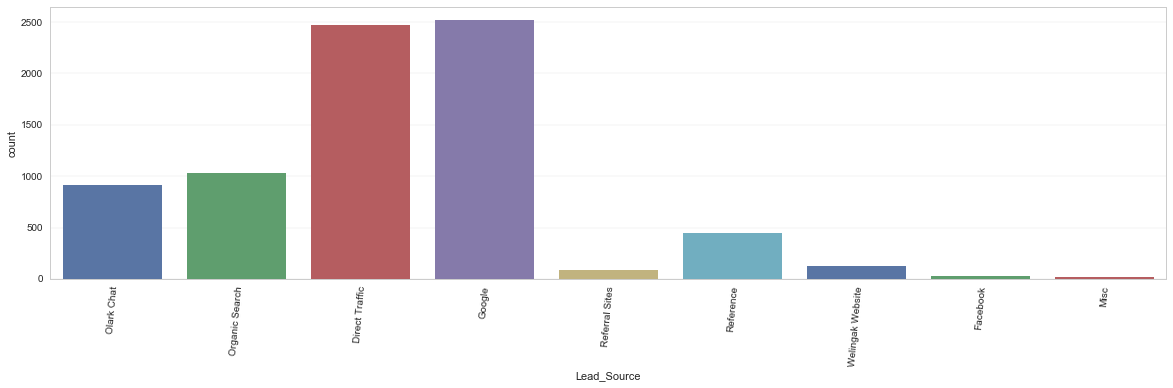

In [38]:
#Plotting a count plot on 'Lead_Source'
plt.figure(figsize=(20,5))
sns.countplot(x = "Lead_Source", palette='deep', data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

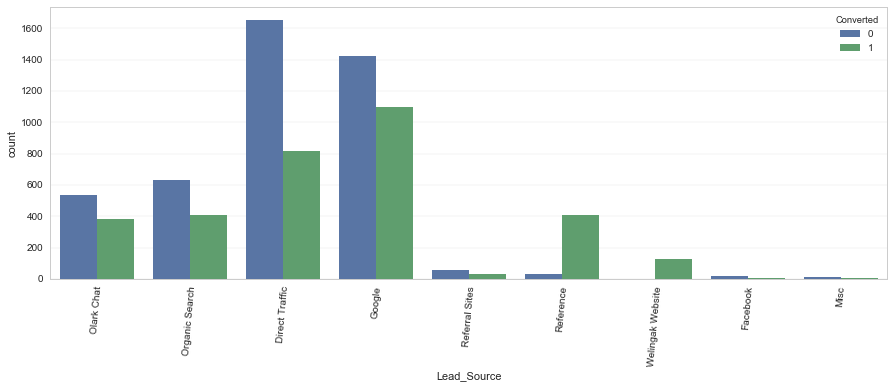

In [39]:
#Plotting the barplot based on 'Lead_Source' and Target Variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead_Source", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

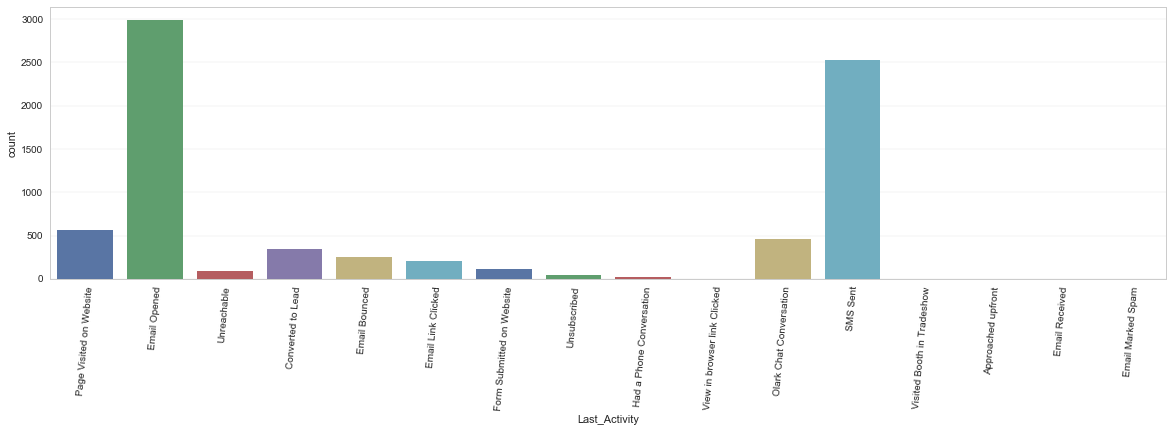

In [40]:
#Plotting a count plot on 'Last_Activity'
plt.figure(figsize=(20,5))
sns.countplot(x = "Last_Activity", palette='deep', data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

#### As we observe there are almost very minimal categorical values or zero values in the column 'Last_Activity'
#### Lets merge those into 'Misc'


In [41]:
#Merging the elements with least frequency elements in 'Lead_Source' into a group 'Misc'
Lead_Score_init_df['Last_Activity'] = Lead_Score_init_df['Last_Activity'].replace(['Approached upfront','Email Received','Visited Booth in Tradeshow','Email Marked Spam',
'Resubscribed to emails','Had a Phone Conversation','View in browser link Clicked'],'Misc')

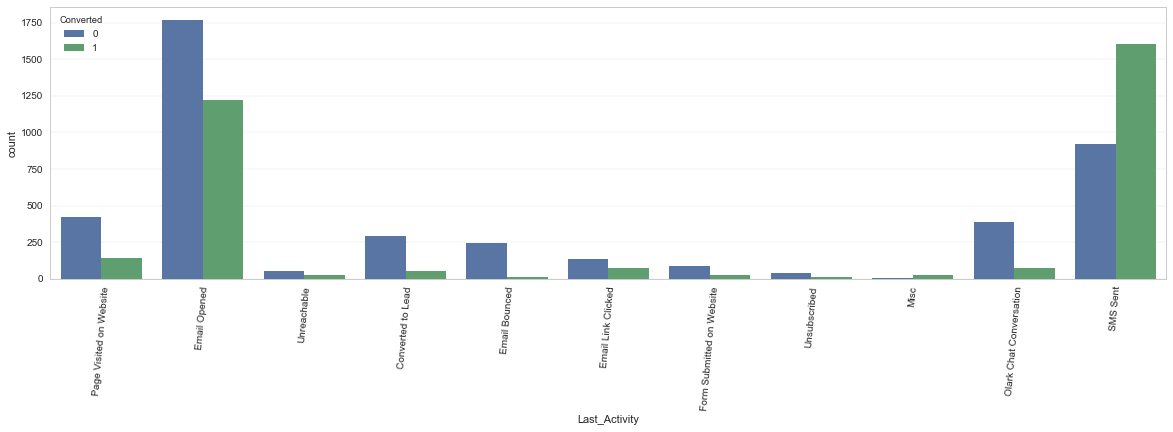

In [42]:
#Plotting the barplot based on 'Last_Activity' and Target Variable 'Converted'
plt.figure(figsize=(20,5))
sns.countplot(x = "Last_Activity", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

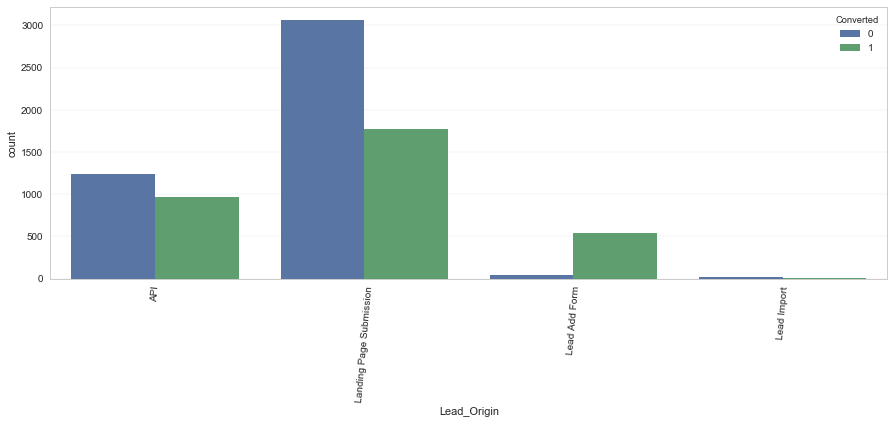

In [43]:
#Plotting the barplot based on 'Lead_Origin' and Target Variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead_Origin", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

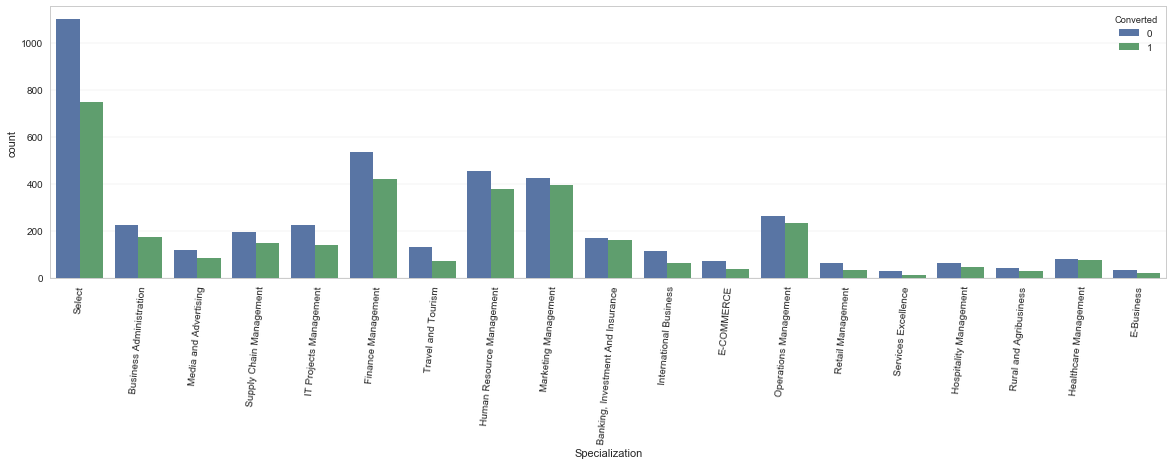

In [44]:
#Plotting the barplot based on 'Specialization' and Target Variable 'Converted'
plt.figure(figsize=(20,5))
sns.countplot(x = "Specialization", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

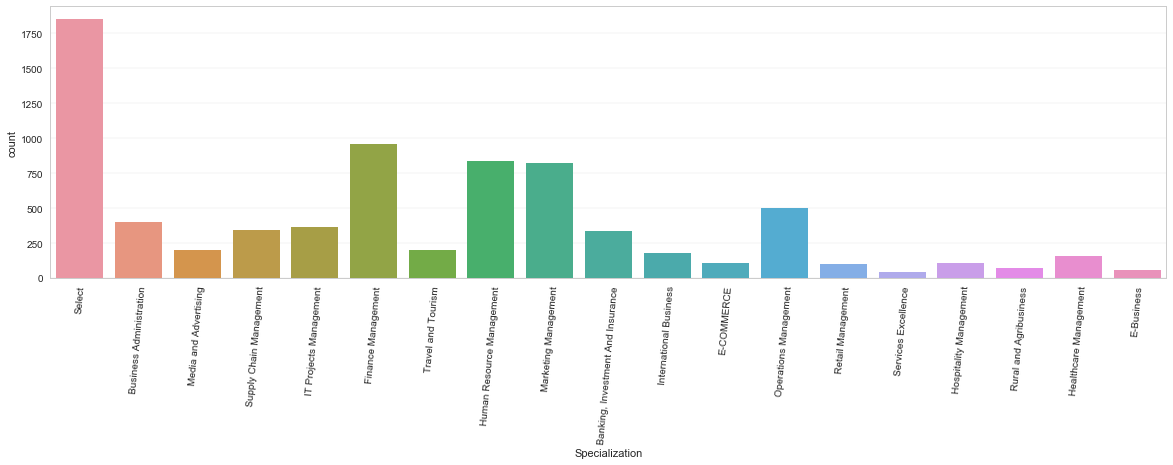

In [45]:
#Plotting the barplot based on 'Specialization' and Target Variable 'Converted'
plt.figure(figsize=(20,5))
sns.countplot(x = "Specialization", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

### 'Select' / Default treatement 

In [46]:
# Checking the values for the column 'Lead Profile'
print(Lead_Score_init_df['Lead_Profile'].value_counts())

Select                         5326
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead_Profile, dtype: int64


In [47]:
#Dropping the colmn Lead_Profile as the columns has majority of the values as 'Select' i.e the default value
Lead_Score_init_df = Lead_Score_init_df.drop(['Lead_Profile'],1)

In [48]:
Lead_Score_init_df.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation', 'Tags', 'Last_Notable_Activity'],
      dtype='object')

In [49]:
Lead_Score_init_df['Specialization'].value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

As we can see that the  'Select' is the majority of the value of Specialization and its a default option.
We can also see that there are there are 750 Converted(1) and 1100 (Converted :0) if we drop these rows still we will be able to maintain the ratio of the converted 0:1 (1.3) so we can go ahead and drop these rows.

In [50]:
Lead_Score_init_df = Lead_Score_init_df[Lead_Score_init_df['Specialization'] != 'Select']

In [51]:
Lead_Score_init_df['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [52]:
Lead_Score_init_df.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation', 'Tags', 'Last_Notable_Activity'],
      dtype='object')

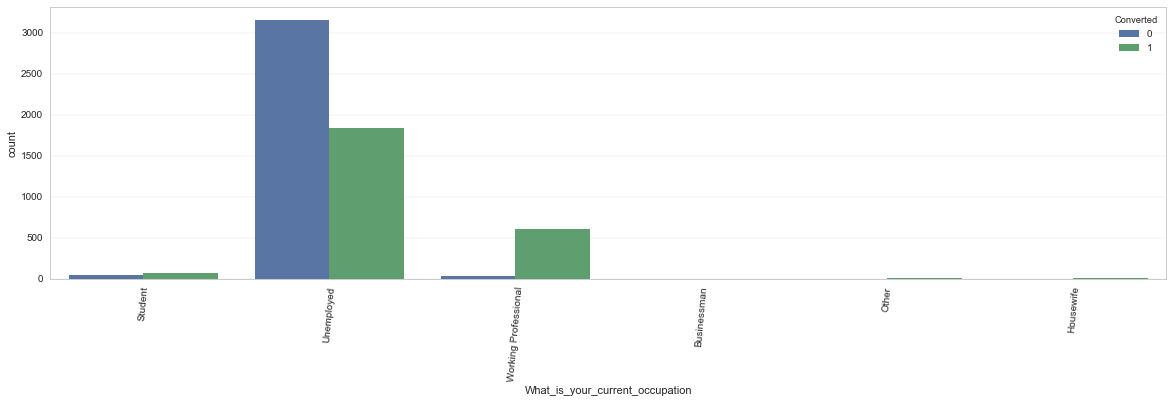

In [53]:
#Plotting the barplot based on 'What_is_your_current_occupation' and Target Variable 'Converted'
plt.figure(figsize=(20,5))
sns.countplot(x = "What_is_your_current_occupation", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

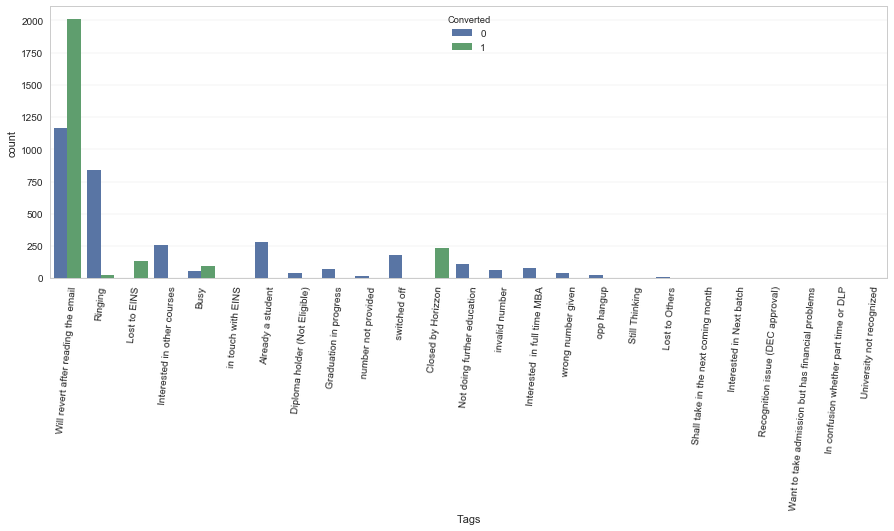

In [54]:
#Plotting the barplot based on 'Tags' and Target Variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x = "Tags", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

#### As we observe there are almost very minimal categorical values or zero values in the column 'Tags'
#### Lets merge those into 'Others'

In [55]:
#Merging the elements with least frequency elements in 'Tags' into a group 'Others'
Lead_Score_init_df['Tags'] = Lead_Score_init_df['Tags'].replace(['In confusion whether part time or DLP', 
                                                                 'in touch with EINS', 'University not recognized',
                                                                 'number not provided', 'Shall take in the next coming month', 
                                                                 'opp hangup','Still Thinking', 'Recognition issue (DEC approval)',
                                                                 'Interested in Next batch', 'Graduation in progress', 
                                                                 'Approached upfront', 'Lateral student', 'Lost to Others',
                                                                 'Want to take admission but has financial problems', 
                                                                 'Diploma holder (Not Eligible)'], 'Others')

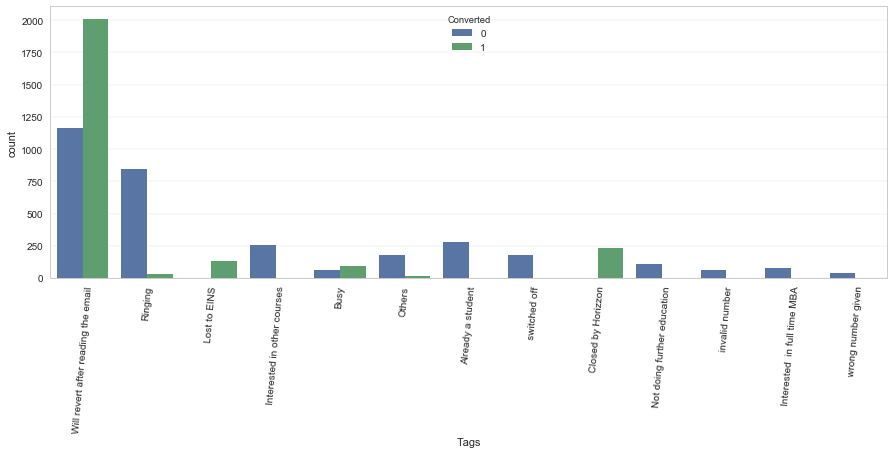

In [56]:
#Plotting the barplot based on 'Tags' and Target Variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x = "Tags", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

In [57]:
# Checking the values for the column 'How did you hear about X Education'
print(Lead_Score_init_df['How_did_you_hear_about_X_Education'].value_counts()) 

Select                   3076
Other                     950
Online Search             791
Word Of Mouth             344
Student of SomeSchool     304
Multiple Sources          148
Advertisements             67
Social Media               66
Email                      24
SMS                        22
Name: How_did_you_hear_about_X_Education, dtype: int64


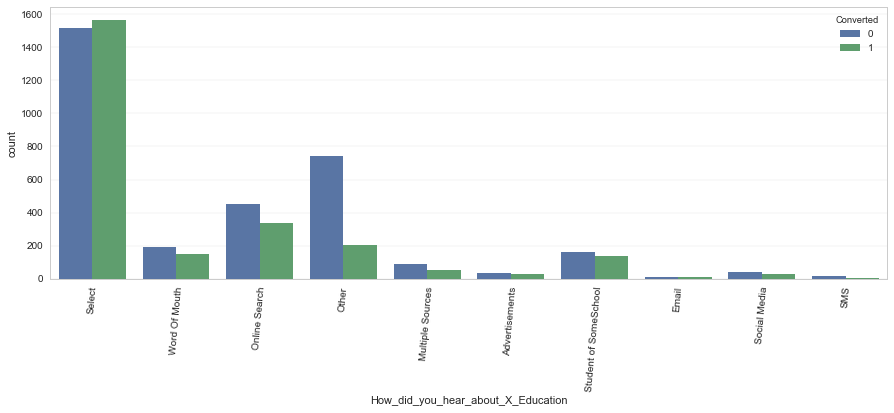

In [58]:
#Plotting the barplot based on 'How_did_you_hear_about_X_Education' and Target Variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x = "How_did_you_hear_about_X_Education", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

As we can see that the majority of the values in the 'How_did_you_hear_about_X_Education' column is 'Select' which can be clubbed into 'Other' as both of them doesnt add much of any information about the column

In [59]:
#Merging the elements o 'Select' into a group 'Others'  of 'How_did_you_hear_about_X_Education'
Lead_Score_init_df['How_did_you_hear_about_X_Education'] = Lead_Score_init_df['How_did_you_hear_about_X_Education'].replace(['Select'], 'Misc')

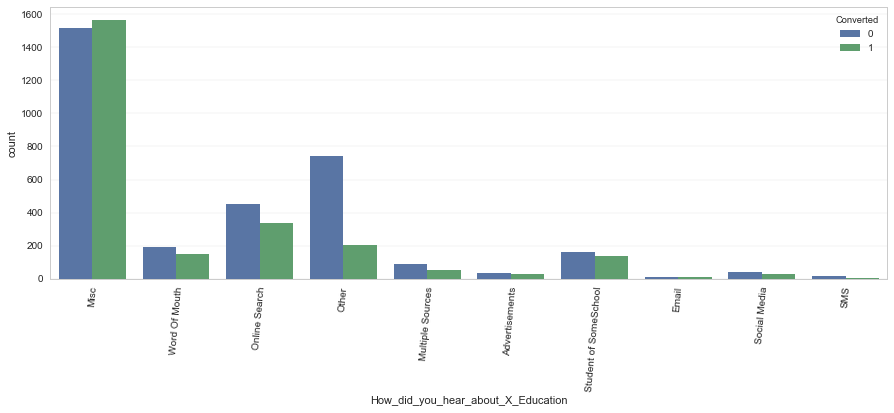

In [60]:
#Plotting the barplot based on 'How_did_you_hear_about_X_Education' and Target Variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x = "How_did_you_hear_about_X_Education", hue = "Converted", data = Lead_Score_init_df)
plt.xticks(rotation = 85)
plt.show()

In [61]:
# For the analysis of continuous variables in the dataframe, creating a new dataframe 
Lead_Score_init_num_df = Lead_Score_init_df[['Total_Time_Spent_on_Website','TotalVisits','Page_Views_Per_Visit']]
Lead_Score_init_num_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Total_Time_Spent_on_Website,TotalVisits,Page_Views_Per_Visit
count,5792.000000,5792.000000,5792.000000
mean,604.620684,4.383115,3.027082
std,555.058578,5.362541,2.104183
min,0.000000,0.000000,0.000000
25%,131.750000,2.000000,2.000000
50%,367.000000,4.000000,3.000000
75%,1086.250000,5.000000,4.000000
90%,1449.000000,8.000000,5.000000
95%,1610.800000,11.000000,7.000000
99%,1866.450000,18.090000,10.000000


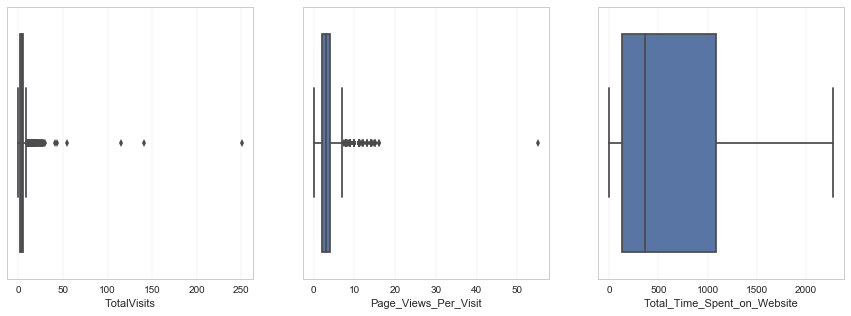

In [62]:
#Checking outliers in numerical columns
plt.figure(figsize=(15,5))
features = ['TotalVisits', 'Page_Views_Per_Visit','Total_Time_Spent_on_Website']
for i in enumerate(features):
    ax = plt.subplot(1,3, i[0]+1)
    sns.boxplot(i[1], data = Lead_Score_init_num_df)

### Outlier Treatement

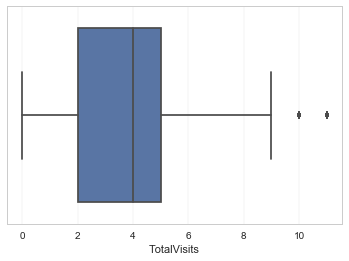

In [63]:
#Capping the outliers (greater than the 95 percentile) to the 95 percentile here it is 11
Lead_Score_init_num_df["TotalVisits"] =np.where(Lead_Score_init_num_df["TotalVisits"]>=11,11,Lead_Score_init_num_df["TotalVisits"])
sns.boxplot(x= Lead_Score_init_num_df["TotalVisits"])

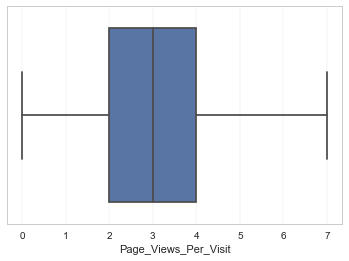

In [64]:
#Capping the outliers (greater than the 95 percentile) to the 95 percentile here it is 7
Lead_Score_init_num_df["Page_Views_Per_Visit"] =np.where(Lead_Score_init_num_df["Page_Views_Per_Visit"]>=7,7,Lead_Score_init_num_df["Page_Views_Per_Visit"])
sns.boxplot(x= Lead_Score_init_num_df["Page_Views_Per_Visit"])

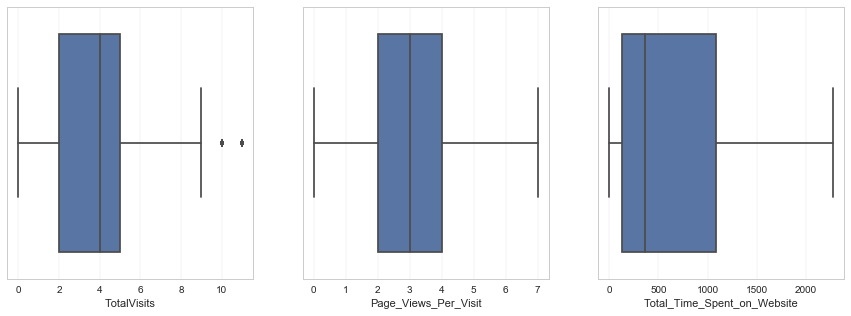

In [65]:
# Checking if the outliers were treated properly by plotting box plots
plt.figure(figsize=(15,5))
features = ['TotalVisits', 'Page_Views_Per_Visit','Total_Time_Spent_on_Website']
for i in enumerate(features):
    ax = plt.subplot(1,3, i[0]+1)
    sns.boxplot(i[1], data = Lead_Score_init_num_df)

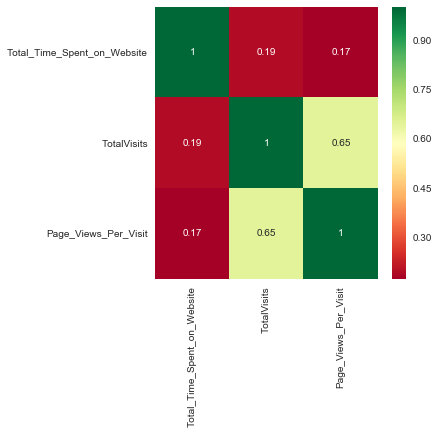

In [66]:
#Plotting a heat map to check the correlation among the numerical columns
plt.figure(figsize = (5, 5))
sns.heatmap(Lead_Score_init_num_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

Here we can see that the TotalVistis and Page_Views_per_visit are highly correlated

In [67]:
Lead_Score_init_df.shape

(5792, 12)

In [68]:
# Percentage of the data retained in dataframe

round(Lead_Score_init_df.shape[0]/9240*100,3)

62.684

In [69]:
Lead_Score_init_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 12 columns):
Lead_Origin                           5792 non-null object
Lead_Source                           5792 non-null object
Converted                             5792 non-null int64
TotalVisits                           5792 non-null float64
Total_Time_Spent_on_Website           5792 non-null int64
Page_Views_Per_Visit                  5792 non-null float64
Last_Activity                         5792 non-null object
Specialization                        5792 non-null object
How_did_you_hear_about_X_Education    5792 non-null object
What_is_your_current_occupation       5792 non-null object
Tags                                  5792 non-null object
Last_Notable_Activity                 5792 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 748.2+ KB


## Data Preparation

In [70]:
# Creating the dummy variables for Categorical columns in the dataframe 
Lead_Score_dummies_df = pd.get_dummies(Lead_Score_init_df[['Lead_Origin', 
                                          'Lead_Source', 
                                          'Last_Activity', 
                                          'Specialization',
                                          'What_is_your_current_occupation',
                                          'How_did_you_hear_about_X_Education',
                                          'Tags',
                                          'Last_Notable_Activity'
                                           ]], drop_first=True)

In [71]:
# Adding the dummy variables and create back to the original dataframe 'Lead_Score_init_df'
Lead_Score_init_df = pd.concat([Lead_Score_init_df, Lead_Score_dummies_df], axis=1)
Lead_Score_init_df.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,How_did_you_hear_about_X_Education,What_is_your_current_occupation,Tags,Last_Notable_Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Misc,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Misc,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Misc,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Misc,Student,Will revert after reading the email,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Online Search,Unemployed,Will revert after reading the email,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,IT Projects Management,Other,Unemployed,Will revert after reading the email,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [72]:
# Dropping the initial columns from the dataframe cretaed after concatenating dummy variables
Lead_Score = Lead_Score_init_df.drop(['Lead_Origin', 
                                          'Lead_Source', 
                                          'Last_Activity', 
                                          'Specialization',
                                          'What_is_your_current_occupation',
                                          'How_did_you_hear_about_X_Education',
                                          'Tags',
                                          'Last_Notable_Activity'],1)

In [73]:
Lead_Score.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Misc,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Misc,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Misc,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,2.0,71,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,4.0,58,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Splitting the dataframe into Train and Test datasets

In [74]:
#Importing the libraries 
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [75]:
## Assigning a feature variable 'X' by dropping the target variable column 'Converted'
X = Lead_Score.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Misc,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Misc,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Misc,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,2.0,71,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,4.0,58,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [76]:
# Assigning a response variable 'y' 
y = Lead_Score['Converted']

In [77]:
# Splitting the dataframe into Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [78]:
# Importing necessary libraries for Feature Scaling
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
X_train[['Total_Time_Spent_on_Website','Page_Views_Per_Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total_Time_Spent_on_Website','Page_Views_Per_Visit','TotalVisits']])


In [80]:
X_train.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Misc,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Misc,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Misc,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
3188,-0.782652,-1.090099,-1.503509,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8278,-0.069086,-0.398625,0.496168,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8129,0.466089,0.654011,-0.628650,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2393,-0.247478,0.394482,-0.003751,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1016,-0.247478,-0.494815,-0.003751,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Building Model

In [81]:
import statsmodels.api as sm

In [82]:
# Applying Logistic Regression on the train dataset
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     3974
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        19:47:04   Pearson chi2:                 2.74e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     1.098e+14   3.57e+07   3.08e+06      0.000     1.1e+14     1.1e+14
TotalVisits                                               4.616e+13   1.19e+06   3.88e+07      0.000    4.62e+13    4.62e+13
Total_Time_Spent_on_Website                               4.616e+14   1.18e+06   3.91e+08      0.000    4.62e+14    4.62e+14
Page_Views_Per_Visit                                       -1.8e+13   1.36e+06  -1.33e+07      0.000    -1.8e+13    -1.8e+13
Lead_Origin_Landing Page Submission                      -5.807e+14   4.57e+06  -1.27e+08      0.000   -5.81e+14   -5.81e+14
Lead_Origin_Lead Add Form                                -7.786e+14   4.14e+07  -1.88e+07      0.000   -7.79e+14   -7.79e+14
Lead_Origin_Lead Import                                   5.431e+13   1.05e+07   5.18e+06      0.000    5.43e+13    5.43e+13
Lead_Source_Facebook                                      5.431e+13   1.05e+07   5.18e+06      0.000    5.43e+13    5.43e+13
Lead_Source_Google                                        4.561e+13   3.34e+06   1.37e+07      0.000    4.56e+13    4.56e+13
Lead_Source_Misc                                         -2.435e+14   2.09e+07  -1.17e+07      0.000   -2.44e+14   -2.44e+14
Lead_Source_Olark Chat                                    3.365e+13   7.13e+06   4.72e+06      0.000    3.36e+13    3.36e+13
Lead_Source_Organic Search                                1.449e+14    3.6e+06   4.03e+07      0.000    1.45e+14    1.45e+14
Lead_Source_Reference                                      1.21e+15   4.17e+07    2.9e+07      0.000    1.21e+15    1.21e+15
Lead_Source_Referral Sites                                6.936e+14   1.36e+07    5.1e+07      0.000    6.94e+14    6.94e+14
Lead_Source_Welingak Website                              7.321e+15   4.54e+07   1.61e+08      0.000    7.32e+15    7.32e+15
Last_Activity_Email Bounced                              -7.265e+13   7.89e+06  -9.21e+06      0.000   -7.26e+13   -7.26e+13
Last_Activity_Email Link Clicked                          8.106e+14   1.32e+07   6.15e+07      0.000    8.11e+14    8.11e+14
Last_Activity_Email Opened                                2.365e+13   6.75e+06   3.51e+06      0.000    2.36e+13    2.36e+13
Last_Activity_Form Submitted on Website                   7.645e+13   9.21e+06    8.3e+06      0.000    7.64e+13    7.64e+13
Last_Activity_Misc                                        7.535e+14    2.2e+07   3.43e+07      0.000    7.54e+14    7.54e+14
Last_Activity_Olark Chat Conversation                    -1.005e+14   9.49e+06  -1.06e+07      0.000      -1e+14      -1e+14
Last_Activity_Page Visited on Website                    -3.123e+13   7.34e+06  -4.26e+06      0.000   -3.12e+13   -3.12e+13
Last_Activity_SMS Sent               

Here we can see that the p values are all less than 0.05, which is good ia good indication stating the coefficients are statistically significant

### Feature selection using RFE

In [83]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [84]:
logreg = LogisticRegression()

In [85]:
# Running the RFE by considering to have 15 variables in o/p
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False])

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 44),
 ('Total_Time_Spent_on_Website', False, 7),
 ('Page_Views_Per_Visit', False, 61),
 ('Lead_Origin_Landing Page Submission', False, 9),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 32),
 ('Lead_Source_Facebook', False, 25),
 ('Lead_Source_Google', False, 39),
 ('Lead_Source_Misc', False, 50),
 ('Lead_Source_Olark Chat', False, 43),
 ('Lead_Source_Organic Search', False, 57),
 ('Lead_Source_Reference', False, 15),
 ('Lead_Source_Referral Sites', False, 4),
 ('Lead_Source_Welingak Website', False, 16),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 14),
 ('Last_Activity_Email Opened', False, 54),
 ('Last_Activity_Form Submitted on Website', False, 18),
 ('Last_Activity_Misc', False, 10),
 ('Last_Activity_Olark Chat Conversation', False, 17),
 ('Last_Activity_Page Visited on Website', False, 19),
 ('Last_Activity_SMS Sent', False, 22),
 ('Last_Activity_Unreachable', False, 24),
 ('Last_Acti

In [87]:
cols = X_train.columns[rfe.support_]
cols

Index(['Lead_Origin_Lead Add Form', 'Last_Activity_Email Bounced',
       'What_is_your_current_occupation_Unemployed',
       'How_did_you_hear_about_X_Education_Misc',
       'How_did_you_hear_about_X_Education_Other',
       'How_did_you_hear_about_X_Education_SMS', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_SMS Sent'],
      dtype='object')

#### Analyzing using Statsmodels

In [88]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm2.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1085.8
Date:                Mon, 02 Mar 2020   Deviance:                       2171.6
Time:                        19:47:06   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.2684      0.300    -10.888      0.000      -3.857      -2.680
Lead_Origin_Lead Add Form                          1.1077      0.412      2.691      0.007       0.301       1.915
Last_Activity_Email Bounced                       -2.0992      0.498     -4.215      0.000      -3.075      -1.123
What_is_your_current_occupation_Unemployed        -2.1635      0.247     -8.771      0.000      -2.647      -1.680
How_did_you_hear_about_X_Education_Misc            1.4073      0.143      9.876      0.000       1.128       1.687
How_did_you_hear_about_X_Education_Other          -1.6340      0.140    -11.663      0.000      -1.909      -1.359
How_did_you_hear_about_X_Education_SMS            -2.5315      0.988     -2.562      0.010      -4.468      -0.595
Tags_Busy                                          4.1728      0.299     13.958      0.000       3.587       4.759
Tags_Closed by Horizzon                            9.4252      1.031      9.141      0.000       7.404      11.446
Tags_Lost to EINS                                 10.5345      1.061      9.926      0.000       8.454      12.615
Tags_Not doing further education                 -20.4703   1.32e+04     -0.002      0.999   -2.59e+04    2.59e+04
Tags_Will revert after reading the email           5.3382      0.209     25.598      0.000       4.929       5.747
Tags_switched off                                 -1.0680      0.741     -1.441      0.150      -2.520       0.385
Tags_wrong number given                          -21.4399   2.24e+04     -0.001      0.999    -4.4e+04    4.39e+04
Last_Notable_Activity_Had a Phone Conversation     3.9974      1.726      2.316      0.021       0.615       7.380
Last_Notable_Activity_SMS Sent                     1.9960      0.137     14.539      0.000       1.727       2.265
==================================================================================================================
"""

In [89]:
# Dropping 'Tags_Not doing further education' which has a high p-value
cols_1 = cols.drop('Tags_Not doing further education',1)

In [90]:
X_train_sm = sm.add_constant(X_train[cols_1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm2.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4039
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1087.3
Date:                Mon, 02 Mar 2020   Deviance:                       2174.6
Time:                        19:47:06   Pearson chi2:                 1.16e+04
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.3235      0.299    -11.134      0.000      -3.909      -2.738
Lead_Origin_Lead Add Form                          1.0646      0.401      2.655      0.008       0.279       1.850
Last_Activity_Email Bounced                       -2.1133      0.496     -4.256      0.000      -3.086      -1.140
What_is_your_current_occupation_Unemployed        -2.1516      0.245     -8.769      0.000      -2.633      -1.671
How_did_you_hear_about_X_Education_Misc            1.4096      0.143      9.884      0.000       1.130       1.689
How_did_you_hear_about_X_Education_Other          -1.6360      0.140    -11.669      0.000      -1.911      -1.361
How_did_you_hear_about_X_Education_SMS            -2.5361      0.988     -2.567      0.010      -4.473      -0.599
Tags_Busy                                          4.2109      0.299     14.084      0.000       3.625       4.797
Tags_Closed by Horizzon                            9.4715      1.031      9.188      0.000       7.451      11.492
Tags_Lost to EINS                                 10.5817      1.062      9.968      0.000       8.501      12.662
Tags_Will revert after reading the email           5.3812      0.208     25.868      0.000       4.973       5.789
Tags_switched off                                 -1.0355      0.741     -1.397      0.162      -2.488       0.417
Tags_wrong number given                          -20.4072   1.36e+04     -0.002      0.999   -2.67e+04    2.66e+04
Last_Notable_Activity_Had a Phone Conversation     4.0178      1.740      2.310      0.021       0.608       7.427
Last_Notable_Activity_SMS Sent                     2.0063      0.137     14.595      0.000       1.737       2.276
==================================================================================================================
"""

In [91]:
# Dropping 'Tags_switched off' which has a high p-value
cols_2 = cols_1.drop('Tags_switched off',1)

In [92]:
X_train_sm = sm.add_constant(X_train[cols_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm2.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4040
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1088.6
Date:                Mon, 02 Mar 2020   Deviance:                       2177.2
Time:                        19:47:06   Pearson chi2:                 1.07e+04
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.3736      0.300    -11.231      0.000      -3.962      -2.785
Lead_Origin_Lead Add Form                          1.0736      0.403      2.664      0.008       0.284       1.863
Last_Activity_Email Bounced                       -2.1130      0.497     -4.252      0.000      -3.087      -1.139
What_is_your_current_occupation_Unemployed        -2.1789      0.248     -8.797      0.000      -2.664      -1.693
How_did_you_hear_about_X_Education_Misc            1.4074      0.143      9.873      0.000       1.128       1.687
How_did_you_hear_about_X_Education_Other          -1.6341      0.140    -11.666      0.000      -1.909      -1.360
How_did_you_hear_about_X_Education_SMS            -2.5313      0.989     -2.560      0.010      -4.469      -0.593
Tags_Busy                                          4.2950      0.296     14.500      0.000       3.714       4.876
Tags_Closed by Horizzon                            9.5475      1.030      9.265      0.000       7.528      11.567
Tags_Lost to EINS                                 10.6575      1.061     10.044      0.000       8.578      12.737
Tags_Will revert after reading the email           5.4598      0.205     26.603      0.000       5.058       5.862
Tags_wrong number given                          -20.3166   1.36e+04     -0.001      0.999   -2.67e+04    2.67e+04
Last_Notable_Activity_Had a Phone Conversation     4.0525      1.766      2.295      0.022       0.592       7.513
Last_Notable_Activity_SMS Sent                     1.9912      0.137     14.535      0.000       1.723       2.260
==================================================================================================================
"""

In [93]:
# Dropping 'Tags_wrong number given' which has a high p-value
cols_3 = cols_2.drop('Tags_wrong number given',1)

In [94]:
X_train_sm = sm.add_constant(X_train[cols_3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm2.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4041
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1089.8
Date:                Mon, 02 Mar 2020   Deviance:                       2179.7
Time:                        19:47:06   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.3905      0.301    -11.247      0.000      -3.981      -2.800
Lead_Origin_Lead Add Form                          1.0774      0.404      2.669      0.008       0.286       1.869
Last_Activity_Email Bounced                       -2.1153      0.497     -4.258      0.000      -3.089      -1.142
What_is_your_current_occupation_Unemployed        -2.1888      0.249     -8.803      0.000      -2.676      -1.701
How_did_you_hear_about_X_Education_Misc            1.4053      0.143      9.856      0.000       1.126       1.685
How_did_you_hear_about_X_Education_Other          -1.6337      0.140    -11.666      0.000      -1.908      -1.359
How_did_you_hear_about_X_Education_SMS            -2.5294      0.989     -2.557      0.011      -4.468      -0.591
Tags_Busy                                          4.3256      0.296     14.610      0.000       3.745       4.906
Tags_Closed by Horizzon                            9.5742      1.030      9.291      0.000       7.554      11.594
Tags_Lost to EINS                                 10.6845      1.061     10.068      0.000       8.605      12.764
Tags_Will revert after reading the email           5.4878      0.205     26.716      0.000       5.085       5.890
Last_Notable_Activity_Had a Phone Conversation     4.0643      1.775      2.289      0.022       0.585       7.544
Last_Notable_Activity_SMS Sent                     1.9846      0.137     14.498      0.000       1.716       2.253
==================================================================================================================
"""

In [95]:
# Calculating VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_3].values, i) for i in range(X_train[cols_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                          Features   VIF
7                          Tags_Closed by Horizzon  1.19
6                                        Tags_Busy  1.08
1                      Last_Activity_Email Bounced  1.07
8                                Tags_Lost to EINS  1.05
5           How_did_you_hear_about_X_Education_SMS  1.01
10  Last_Notable_Activity_Had a Phone Conversation  1.01
4         How_did_you_hear_about_X_Education_Other  0.39
9         Tags_Will revert after reading the email  0.19
2       What_is_your_current_occupation_Unemployed  0.13
3          How_did_you_hear_about_X_Education_Misc  0.11
11                  Last_Notable_Activity_SMS Sent  0.09
0                        Lead_Origin_Lead Add Form  0.02


The VIF values look good as they are all below 5.

In [97]:
# Deriving predicted values on train dataset
y_train_predict = outcome.predict(X_train_sm)
print(y_train_predict[:10])

3188    0.987577
8278    0.003761
8129    0.100701
2393    0.477137
1016    0.003761
1724    0.151202
48      0.015157
8842    0.021030
7812    0.998514
3008    0.477137
dtype: float64


In [98]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_predict_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_predict})
y_train_predict_final['Lead_ID'] = y_train.index
y_train_predict_final.head()

,Converted,Converted_prob,Lead_ID
3188,0,0.987577,3188
8278,0,0.003761,8278
8129,0,0.100701,8129
2393,1,0.477137,2393
1016,0,0.003761,1016


### Plotting ROC Curve

In [99]:
#Importing necessary libraries
from sklearn import metrics

In [100]:
def plot_ROC(actual, proba):
    fpr, tpr, thresholds = metrics.roc_curve( actual, proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, proba)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC_curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR (or) [1 - Specificity]')
    plt.ylabel('Sensitivity')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predict_final.Converted, y_train_predict_final.Converted_prob, drop_intermediate = False )

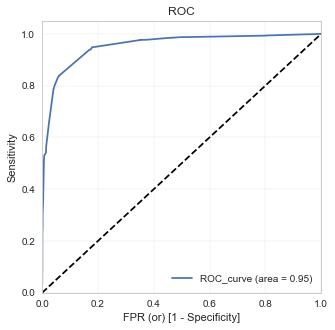

In [102]:
plot_ROC(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

### Finding optimal cut-off point 

In [103]:
#Importing necessary libraries
from sklearn.metrics import precision_score, recall_score

In [104]:
# creating columns with different probabilities 
numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    y_train_predict_final[n]= y_train_predict_final.Converted_prob.map(lambda x: 1 if x > n else 0)
y_train_predict_final.head()

,Converted,Converted_prob,Lead_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3188,0,0.987577,3188,1,1,1,1,1,1,1,1,1,1
8278,0,0.003761,8278,1,0,0,0,0,0,0,0,0,0
8129,0,0.100701,8129,1,1,0,0,0,0,0,0,0,0
2393,1,0.477137,2393,1,1,1,1,1,0,0,0,0,0
1016,0,0.003761,1016,1,0,0,0,0,0,0,0,0,0


In [105]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs
# Importing confusion_matrix from sklearn
cutoff_prob_df = pd.DataFrame(columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cfm = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final[i] )
    total=sum(sum(cfm))
    Sensitivity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
    Specificity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
    Accuracy = (cfm[0,0]+cfm[1,1])/total    
    cutoff_prob_df.loc[i] = [i, Sensitivity, Specificity, Accuracy]
print(cutoff_prob_df)

     Probability  Sensitivity  Specificity  Accuracy
0.0          0.0     1.000000     0.000000  0.441046
0.1          0.1     0.984899     0.542365  0.737543
0.2          0.2     0.946868     0.821712  0.876912
0.3          0.3     0.939597     0.827891  0.877158
0.4          0.4     0.937919     0.831421  0.878392
0.5          0.5     0.838367     0.939100  0.894672
0.6          0.6     0.796421     0.956752  0.886038
0.7          0.7     0.786913     0.959400  0.883325
0.8          0.8     0.650447     0.976169  0.832511
0.9          0.9     0.530201     0.992056  0.788357


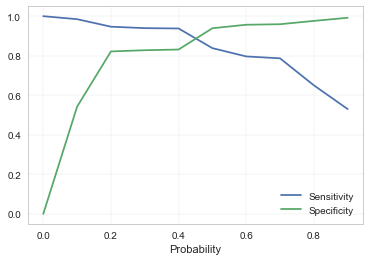

In [106]:
# Plotting Sensitivity and Specificity 
cutoff_prob_df.plot.line(x='Probability', y=['Sensitivity','Specificity'])
plt.show()

### The optimal cut-off point for the model is found to be 0.45

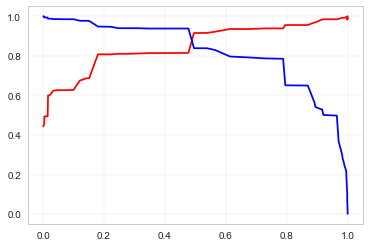

In [107]:
#Plotting the Precision_Recall Curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

In [108]:
#Creating a new column 'predicted' to have '1' if Converted_prob > 0.45 or else have '0'
y_train_predict_final['predicted'] = y_train_predict_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)

In [109]:
#Assigning Lead_Score to train model
y_train_predict_final['Lead_Score'] = y_train_predict_final.Converted_prob.map(lambda x: round(x*100))
y_train_predict_final.head()

,Converted,Converted_prob,Lead_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead_Score
3188,0,0.987577,3188,1,1,1,1,1,1,1,1,1,1,1,99
8278,0,0.003761,8278,1,0,0,0,0,0,0,0,0,0,0,0
8129,0,0.100701,8129,1,1,0,0,0,0,0,0,0,0,0,10
2393,1,0.477137,2393,1,1,1,1,1,0,0,0,0,0,1,48
1016,0,0.003761,1016,1,0,0,0,0,0,0,0,0,0,0,0


In [110]:
# # Deriving Confusion matrix for the train dataset
confusion_m = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final.predicted )
print(confusion_m)

[[1884  382]
 [ 111 1677]]


In [111]:
## Overall Accuracy of train model in percentage
print("Accuracy:", round(metrics.accuracy_score(y_train_predict_final.Converted, y_train_predict_final.predicted)*100,3))

Accuracy: 87.839


In [112]:
# Assigning each element in Confusion_Matrix to variables
TN = confusion_m[0,0] # True Negatives
FP = confusion_m[0,1] # False Positives
FN = confusion_m[1,0] # False Negatives
TP = confusion_m[1,1] # True Positives

In [113]:
# Checking Sensitivity/Recall of the obtained logistic Regression model
print("Sensitivity:",round(TP / float(TP+FN)*100,2))

Sensitivity: 93.79


In [114]:
# Finding Positive Predictive Value (PPV)/Precision of the obtained logistic Regression model
print("Precision:",round(TP / float(TP+FP)*100,2))

Precision: 81.45


In [115]:
# Checking Specificity of the obtained logistic Regression model
print("Specificity:",round(TN / float(TN+FP)*100,2))


Specificity: 83.14


In [116]:
# Finding Negative Predictive Value (NPV) of the obtained logistic Regression model
print("NPV:", round(TN / float(TN+ FN)*100,2))

NPV: 94.44


In [117]:
# False Positive Rate Value (FPR) of the obtained logistic Regression model
print(round(FP / float(TN+ FP),4))

0.1686


In [118]:
# Finding Precision Score for final train dataframe
print("Precision_Score:", round(precision_score(y_train_predict_final.Converted , y_train_predict_final.predicted)*100,2))

Precision_Score: 81.45


In [119]:
# Finding Recall Score for final train dataframe
print("Recall_Score:", round(recall_score(y_train_predict_final.Converted, y_train_predict_final.predicted)*100,2))

Recall_Score: 93.79


In [120]:
# Assigning predicted column to the dataframe based on optimal cut-off probability
y_train_predict_final['predicted'] = y_train_predict_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)

In [121]:
#Assigning Lead_Score to train model and getting the final train dataframe
y_train_predict_final['Lead_Score'] = y_train_predict_final.Converted_prob.map( lambda x: round(x*100))
y_train_predict_final.head()

,Converted,Converted_prob,Lead_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead_Score
3188,0,0.987577,3188,1,1,1,1,1,1,1,1,1,1,1,99
8278,0,0.003761,8278,1,0,0,0,0,0,0,0,0,0,0,0
8129,0,0.100701,8129,1,1,0,0,0,0,0,0,0,0,0,10
2393,1,0.477137,2393,1,1,1,1,1,0,0,0,0,0,1,48
1016,0,0.003761,1016,1,0,0,0,0,0,0,0,0,0,0,0


### Hence, Train model's Cut-off value is at 0.45, with good scores of Accuracy - 87.8, Sensitivity - 93.8               Specificity - 83.1, Precision - 81.4,  Recall - 93.8 

### Predicting over the test data

In [122]:
X_test[['Total_Time_Spent_on_Website','Page_Views_Per_Visit','TotalVisits']] = scaler.fit_transform(X_test[['Total_Time_Spent_on_Website','Page_Views_Per_Visit','TotalVisits']])

In [123]:
X_test = X_test[cols_3]
X_test.head()

,Lead_Origin_Lead Add Form,Last_Activity_Email Bounced,What_is_your_current_occupation_Unemployed,How_did_you_hear_about_X_Education_Misc,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_SMS Sent
7614,0,0,1,1,0,0,0,0,0,0,0,1
7388,0,0,1,1,0,0,0,0,0,0,0,1
7657,0,0,1,0,1,0,0,0,0,1,0,0
965,0,0,1,1,0,0,0,0,0,0,0,0
6875,0,0,1,1,0,0,0,0,0,0,0,0


In [124]:
X_test_sm = sm.add_constant(X_test)

In [125]:
y_test_pred = outcome.predict(X_test_sm)
print(y_test_pred[:10])

7614    0.100701
7388    0.100701
7657    0.151202
965     0.015157
6875    0.015157
3184    0.151202
8969    0.120760
8061    0.477137
2949    0.015157
8980    0.995877
dtype: float64


In [126]:
#Converting 'y_test_pred' which is an array to a dataframe 'y_pred_df'
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
7614,0.100701
7388,0.100701
7657,0.151202
965,0.015157
6875,0.015157


In [127]:
print(y_test[:10])

7614    0
7388    0
7657    0
965     0
6875    0
3184    0
8969    0
8061    1
2949    0
8980    1
Name: Converted, dtype: int64


In [128]:
#Converting 'y_test' which is an array to a dataframe 'y_test_df1'
y_test_df1 = pd.DataFrame(y_test)

In [129]:
# Adding 'Lead_ID' to index
# Dropping index for both dataframes 'y_test_df1' and 'y_pred_df'
y_test_df1['Lead_ID'] = y_test_df1.index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)

In [130]:
# Concatenate both the datframes 'y_test_df1' and 'y_pred'
y_predict_model_final = pd.concat([y_test_df1, y_pred_df],axis=1)
y_predict_model_final.head()

,Converted,Lead_ID,0
0,0,7614,0.100701
1,0,7388,0.100701
2,0,7657,0.151202
3,0,965,0.015157
4,0,6875,0.015157


In [131]:
# Renaming the column to 'Converted_Prob' indicating the probability
y_predict_model_final = y_predict_model_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns to have a better understanding
y_predict_model_final = y_predict_model_final.reindex_axis(['Lead_ID','Converted_prob','Converted'], axis=1)

y_predict_model_final.head()

,Lead_ID,Converted_prob,Converted
0,7614,0.100701,0
1,7388,0.100701,0
2,7657,0.151202,0
3,965,0.015157,0
4,6875,0.015157,0


In [132]:
# Assigning the column 'Predicted_Result' based on predicted probability
y_predict_model_final['Predicted_Result'] = y_predict_model_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)
y_predict_model_final.head()

,Lead_ID,Converted_prob,Converted,Predicted_Result
0,7614,0.100701,0,0
1,7388,0.100701,0,0
2,7657,0.151202,0,0
3,965,0.015157,0,0
4,6875,0.015157,0,0


In [133]:
# Obtaining Final model by assigning 'Lead_Score'
y_predict_model_final['Lead_Score'] = y_predict_model_final.Converted_prob.map( lambda x: round(x*100))
y_predict_model_final.head()

,Lead_ID,Converted_prob,Converted,Predicted_Result,Lead_Score
0,7614,0.100701,0,0,10
1,7388,0.100701,0,0,10
2,7657,0.151202,0,0,15
3,965,0.015157,0,0,2
4,6875,0.015157,0,0,2


In [134]:
# Checking the accuracy attained in the model
print("Accuracy:",round(metrics.accuracy_score(y_predict_model_final.Converted, y_predict_model_final.Predicted_Result)*100,2))

Accuracy: 86.94


### Accuracy of the model is good with a value of  86.94

In [135]:
Confusion_Matrix = metrics.confusion_matrix(y_predict_model_final.Converted, y_predict_model_final.Predicted_Result)
print(Confusion_Matrix)

[[821 171]
 [ 56 690]]


In [136]:
# Assigning each element in Confusion_Matrix to variables
TP = Confusion_Matrix[1,1] # True Positives
FP = Confusion_Matrix[0,1] # False Positives
TN = Confusion_Matrix[0,0] # True Negatives
FN = Confusion_Matrix[1,0] # False Negatives

In [137]:
# Finding Sensitivity/Recall of the obtained logistic Regression model
print("Sensitivity:",round(TP / float(TP+FN)*100,2))

Sensitivity: 92.49


### Sensitivity of the model is reasonably good with a value of 92.49

In [138]:
# Finding Specificity of the obtained logistic Regression model
print("Specificity:",round(TN / float(TN+FP)*100,2))

Specificity: 82.76


### Specificity of the model is reasonably good with a value of 82.76

In [139]:
# Finding Positive Predictive Value (PPV)/Precision of the obtained logistic Regression model
print("Precision:",round(TP / float(TP+FP)*100,2))

Precision: 80.14


### Precision of the model is reasonably good with a value of  80.14

### Objective of this Exercise:
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Conclusion
As per the objective of this excersise, we need to predict the Actual "1's" as 1 and Actual "0's" as 0.
And as per the target from CEO of X Education, it is necessary to get 80% lead conversion which would mean we need to have the "Sensitivity" in our model to be atleast 80 %, and the model we built has the Senstitivity of 92.49% (i.e greater than 80%) and as per the first ask we need to predict correct 1's and 0's i.e accuracy is also good here with 86.94%.